<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация." data-toc-modified-id="Общая-информация.-1">Общая информация.</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1">Предобработка данных</a></span></li></ul></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2">Функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3">Исследовательский анализ данных</a></span></li><li><span><a href="#Расчет-маркетинга" data-toc-modified-id="Расчет-маркетинга-4">Расчет маркетинга</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-5">Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Расчет-конверсии" data-toc-modified-id="Расчет-конверсии-5.1">Расчет конверсии</a></span></li><li><span><a href="#Расчет-удержания" data-toc-modified-id="Расчет-удержания-5.2">Расчет удержания</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-регионам:" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-регионам:-5.3">Окупаемость рекламы с разбивкой по регионам:</a></span></li><li><span><a href="#Oкупаемость-рекламы-с-разбивкой-по-каналам:" data-toc-modified-id="Oкупаемость-рекламы-с-разбивкой-по-каналам:-5.4">Oкупаемость рекламы с разбивкой по каналам:</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-устройствам:" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-устройствам:-5.5">Окупаемость рекламы с разбивкой по устройствам:</a></span></li><li><span><a href="#Распределение-количества-пользователей-каналов-в-зависимости-от-устройств:" data-toc-modified-id="Распределение-количества-пользователей-каналов-в-зависимости-от-устройств:-5.6">Распределение количества пользователей каналов в зависимости от устройств:</a></span></li><li><span><a href="#Анализ-TipTop" data-toc-modified-id="Анализ-TipTop-5.7">Анализ TipTop</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6">Выводы</a></span></li></ul></div>

# Анализ убытков развлекательного приложения Procrastinate Pro+

В нашем распоряжении имеются данные пользователей и затрат на рекламу приложения Procrastinate Pro+.  
По имеющимся данным, вложения в рекламу не окупаются.

**Цель исследования** 

* выявить факторы, влиияющие на привлечение пользователей
* выявить причины по которым реклама не окупается
* найти способы вывести расходы в плюс 


**Оцениваемые параметры**:  

* рекламные каналы, откуда приходят пользователи
* устройства пользователей
* регионы пользователей
* стоимость привлечения пользователей из различных рекламных каналов
* LTV клиента
* минимальный уровень расходов для оккупаемости рекламы


**План исследования**:  
* расчет затрат на рекламу
* анализ конверсии 
* анализ удержания
* анализ LTV
* анализ CAC
* анализ ROI


## Общая информация.

In [1]:
# импорт бибилиотек
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#загрузим данные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')


In [5]:
#файл с визитами
visits.head()



,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице `visits` десять столбцов.  
Столбцы `Session Start` и `Session End` нужно преобразовать к формату дат. Остальное верно.

Согласно документации к данным:  

* `User Id` — уникальный идентификатор пользователя
* `Region` — страна пользователя
* `Device` — тип устройства пользователя
* `Channel` — идентификатор источника перехода
* `Session Start` — дата и время начала сессии
* `ESession End` — дата и время окончания сессии


In [7]:
#файл с заказами
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице `orders` три столбца.  
Столбец `Event Dt` нужно преобразовать к формату дат. Остальное верно.

Согласно документации к данным:  

* `User Id` — уникальный идентификатор пользователя
* `Event Dt` — дата и время покупки
* `Revenue` — сумма заказа


In [9]:
#файл с расходами
ad_costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [10]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице `costs` три столбца.  
Столбец `dt` нужно преобразовать к формату дат. Остальное верно.

Согласно документации к данным:  

* `dt` — дата проведения рекламной кампании
* `Channel` — идентификатор рекламного источника
* `costs` — расходы на эту кампанию

### Предобработка данных

In [11]:
#приведем к нижнему регистру названия столбцов
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
ad_costs.columns = ad_costs.columns.str.lower()

In [12]:
#приведем к правильному стилю
df_list = [visits,orders]
for df in df_list:
    df = df.rename(columns={'user id': 'user_id','session start':'session_start','session end':'session_end','event dt':'event_dt'},inplace = True)
    
   

In [13]:
#проверим пропуски
print(visits.isna().sum())
print()
print(orders.isna().sum())
print()
print(ad_costs.isna().sum())



user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64


пропусков нет

In [14]:
#проверим дубликаты

display(visits[visits.duplicated(subset=['user_id','region','device','channel','session_start','session_end'], keep=False)])
display(orders[orders.duplicated(subset=['user_id','event_dt','revenue'], keep=False)])
display(ad_costs[ad_costs.duplicated(subset=['dt','channel','costs'], keep=False)])

,user_id,region,device,channel,session_start,session_end


,user_id,event_dt,revenue


,dt,channel,costs


дубликатов нет

In [15]:
#преобразуем столбцы с датами в нужный формат
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

In [16]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


проверим корректность данных

In [17]:
#минимальная и маскимальная даты сессий в таблице visits
display(visits['session_start'].min())
display(visits['session_start'].max())
display(visits['session_end'].min())
display(visits['session_end'].max())


Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-31 23:59:23')

Timestamp('2019-05-01 00:07:06')

Timestamp('2019-11-01 01:38:46')

In [18]:
#корректность времени сессии в таблице visits (окончания не меньше начала)
len(visits.loc[(visits['session_end'] < visits['session_start'])])

0

In [19]:
#минимальная и маскимальная даты в таблице orders
display(orders['event_dt'].min())
display(orders['event_dt'].max())

Timestamp('2019-05-01 00:28:11')

Timestamp('2019-10-31 23:56:56')

In [20]:
#минимальная и максимальная даты в таблице ad_costs
display(ad_costs['dt'].min())
display(ad_costs['dt'].max())

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

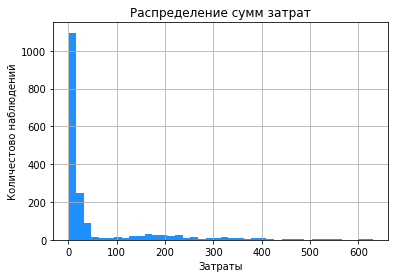

In [83]:
#распределение значений в таблице ad_costs
ad_costs['costs'].hist(bins = 40, color='dodgerblue')
plt.xlabel('Затраты')
plt.ylabel('Количестово наблюдений')
plt.title('Распределение сумм затрат');

Большинство затрат лежит в диапазоне до 50, но присутствуют экстремально высокие значения, посмотрим на них:

In [29]:
ad_costs.sort_values(by='costs', ascending=False).head()

,dt,channel,costs
695,2019-10-03,TipTop,630.0
690,2019-09-28,TipTop,623.0
684,2019-09-22,TipTop,616.0
691,2019-09-29,TipTop,605.5
689,2019-09-27,TipTop,602.0


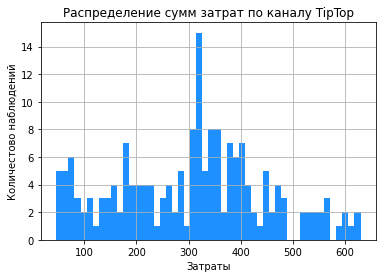

In [75]:
#построим гистограмму только по каналу TipTop
ad_costs.loc[ad_costs['channel']=='TipTop']['costs'].hist(bins = 50, color='dodgerblue')
plt.xlabel('Затраты')
plt.ylabel('Количестово наблюдений')
plt.title('Распределение сумм затрат по каналу TipTop');

По каналу TipTop значения costs действительно выше типовых,это не случайные значения

**Данные качественные  
Пропусков и дубликатов в исходных данных не было  
Значения дат соответсвуют заявленным в ТЗ  
Ошибочных значений не наблюдается**

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [31]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
        #if event in events['event_name'].unique():
            #profiles[event] = profiles['user_id'].isin(
                #events.query('event_name == @event')['user_id'].unique()
            #)

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [32]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [33]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        #result = result[['cohort_size'] + list(range(horizon_days))]
        exist_cohorts = []
        for i in range(horizon_days):
            if i in result.columns:
                exist_cohorts.append(i)
        result = result[['cohort_size'] + exist_cohorts]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [34]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [35]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [36]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Коэффициент удержания')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Коэффициент удержания')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Коэффициент удержания')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Коэффициент удержания')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [37]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.ylabel('Коэффициент конверсии')
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.ylabel('Коэффициент конверсии')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [38]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.ylabel('LTV')
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('LTV')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.ylabel('ROI')
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.ylabel('ROI')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

In [39]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, ad_costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [40]:
#определим минимальную и максимальную даты привлечения пользователей
display(profiles['first_ts'].max())
display(profiles['first_ts'].min())

Timestamp('2019-10-27 23:59:04')

Timestamp('2019-05-01 00:00:41')

Даты соответствуют датам заявленным в ТЗ

In [41]:
#разбивка пользователей по странам
profiles.groupby('region').agg(
    {'user_id':'nunique','payer':'mean'}).sort_values(
                                            by = 'user_id', ascending=False).style.format({('payer'):'{:.2%}'})

,user_id,payer
region,,
United States,100002,6.90%
UK,17575,3.98%
France,17450,3.80%
Germany,14981,4.11%


Большинство пользователей приходит из США, меньше всего из Германии.  
Самая высокая доля платящих пользвателей также приходится на США - 7,9%. В странах Европы доля почти в 2 раза меньше ~ 4%.

In [42]:
#разбивка пользователей по устройствам
profiles.groupby('device').agg(
    {'user_id':'nunique','payer':'mean'}).sort_values(
                                            by = 'user_id', ascending=False).style.format({('payer'):'{:.2%}'})

,user_id,payer
device,,
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%
Mac,30042,6.36%


Большая часть пользователей пользуются мобильными устройствами - из них IOS популярнее чем Android.  
Самая высокая доля платящих пользвателей также приходится на пользователей Apple - мобильные устройства и ноутбуки, на Android доля плательщиков меньше.  
ПК платят хуже всех.

In [43]:
#разбивка пользователей по каналам привлечения
profiles.groupby('channel').agg(
    {'user_id':'nunique','payer':'mean'}).sort_values(
                                            by = 'user_id', ascending=False).style.format({('payer'):'{:.2%}'})

,user_id,payer
channel,,
organic,56439,2.06%
FaceBoom,29144,12.20%
TipTop,19561,9.60%
OppleCreativeMedia,8605,2.71%
LeapBob,8553,3.06%
WahooNetBanner,8553,5.30%
RocketSuperAds,4448,7.91%
MediaTornado,4364,3.57%
YRabbit,4312,3.83%


Главные источники привлечения, кроме огранического  - `FaceBoom` и `TipTop`.  

Максимальная доля платящих пользоваетелей приходится на `FaceBoom`.  
Также высокая доля платящих у `AdNonSense` и `lambdaMediaAds`, но абсолютное количество пользователей по ним минимально.

Проверим как соотносятся рекламные каналы и страны

In [44]:
profiles.groupby(['region','channel']).agg({'user_id':'count'})


user_id
region        channel                    
France        AdNonSense             1366
              LeapBob                2988
              OppleCreativeMedia     2991
              WahooNetBanner         2971
              lambdaMediaAds          742
              organic                6392
Germany       AdNonSense             1219
              LeapBob                2519
              OppleCreativeMedia     2562
              WahooNetBanner         2579
              lambdaMediaAds          649
              organic                5453
UK            AdNonSense             1295
              LeapBob                3046
              OppleCreativeMedia     3052
              WahooNetBanner         3003
              lambdaMediaAds          758
              organic                6421
United States FaceBoom              29144
              MediaTornado           4364
              RocketSuperAds         4448
              TipTop                19561
              YRabbit                4312
              organic               38173

`AdNonSense`	`LeapBob` `OppleCreativeMedia` `WahooNetBanner` `lambdaMediaAds` работают в Европе  
`FaceBoom`	`MediaTornado` `RocketSuperAds` `TipTop` `YRabbit` работают в США 

In [45]:
#добавмим признак региона в таблицу
def categorize_region(region):
    try:
        if region in ['AdNonSense','LeapBob','OppleCreativeMedia','WahooNetBanner','lambdaMediaAds']:
            return 'EU'
        else:
            return 'US'
       
    except:
        pass
    
profiles['region_main'] = profiles['channel'].apply(categorize_region)   
ad_costs['region_main'] = ad_costs['channel'].apply(categorize_region)  

 * **США - ключевой рынок**
 * **клиенты США чаще конвертируются в плательщиков**
 * **основные устройства пользователей мобильные телефоны - iPhone на 1 месте**
 * **доля платящих клиентов iPhone выше, чем Android**
 * **`FaceBoom`, `TipTop` основные каналы США**
 * **`OppleCreativeMedia`, `LeapBob`, `WahooNetBanner` основные каналы Европы**
 
 

## Расчет маркетинга

Посмотрим распеределение затрат на рекламу по различным источникам

In [46]:
ad_costs_sum = ad_costs.groupby(['region_main','channel']).agg({'costs':'sum'}).sort_values(
                                            by = 'costs', ascending=False)
ad_costs_sum.loc['total']= ad_costs_sum.sum()
ad_costs_sum['share,%'] = (ad_costs_sum['costs'] *100/ ad_costs_sum.loc['total', 'costs']).apply('{:.2f}%'.format)
display(ad_costs_sum)

,costs,"share,%"
"(US, TipTop)",54751.30,51.90%
"(US, FaceBoom)",32445.60,30.75%
"(EU, WahooNetBanner)",5151.00,4.88%
"(EU, AdNonSense)",3911.25,3.71%
"(EU, OppleCreativeMedia)",2151.25,2.04%
"(US, RocketSuperAds)",1833.00,1.74%
"(EU, LeapBob)",1797.60,1.70%
"(EU, lambdaMediaAds)",1557.60,1.48%
"(US, MediaTornado)",954.48,0.90%
"(US, YRabbit)",944.22,0.90%


80% затрат приходится на каналы США `FaceBoom` и `TipTop`  
Из Европейских каналов на первых местах `WahooNetBanner` и `AdNonSense`

Также отметим, что канал `FaceBoom` приводит больше пользователей, чем `TipTop`, имеет большую конверсию в плательщиков  
и имееет меньшие затраты на рекламу.  

Посмотрим динамику изменения затрат во времени по каждому источнику

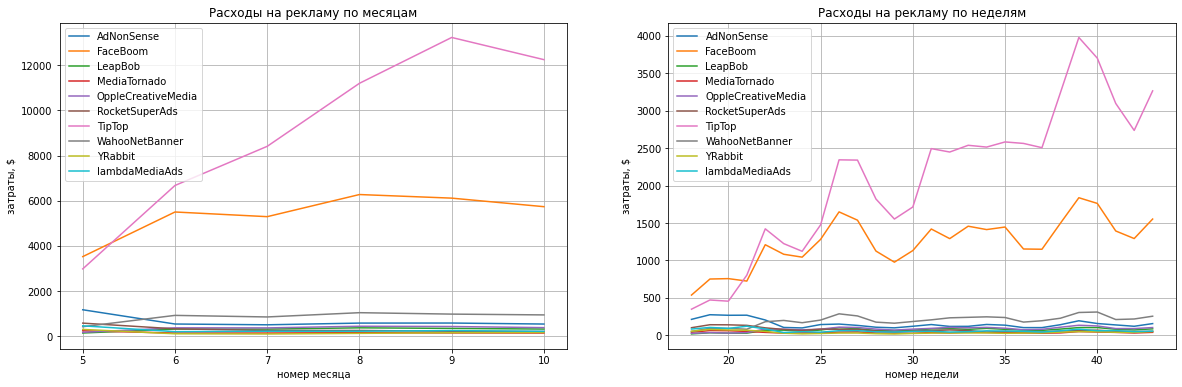

In [47]:
ad_costs['month'] = pd.to_datetime(ad_costs['dt']).dt.month
ad_costs['week'] = pd.to_datetime(ad_costs['dt']).dt.isocalendar().week

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 2, 1)
    
ad_costs.pivot_table(index='month',  columns='channel', values='costs',  aggfunc='sum').plot(grid=True, ax=ax1)
plt.legend()
plt.ylabel('затраты, $')
plt.xlabel('номер месяца')
plt.title('Расходы на рекламу по месяцам')


ax2 = plt.subplot(1, 2, 2)
  
ad_costs.pivot_table(index='week', columns='channel', values='costs',  aggfunc='sum').plot(grid=True, ax=ax2)
plt.legend()
plt.ylabel('затраты, $')
plt.xlabel('номер недели')
plt.title('Расходы на рекламу по неделям')

plt.show()

Начальные бюджеты на рекламу у каналов `TipTop` и `FaceBoom` были равны, но начиная с конца июня, с 26 недели затраты по каналу TipTop стали увеличиваться. К концу периода затраты увеличилиь  в 4 раза

Посмотрим сколько стоило привлечение одного пользователя (CAC) из каждого источника.

In [48]:
cac = profiles.query('channel != "organic"').groupby(['region_main','channel']).agg({'user_id':'count','acquisition_cost':'sum'})
cac['cac'] = cac['acquisition_cost']/cac['user_id']
cac_total = cac['acquisition_cost'].sum()/cac['user_id'].sum()
display(cac.sort_values(by = 'cac', ascending=False))
print("Средний CAC по проекту",(round(cac_total,2)))

user_id  acquisition_cost       cac
region_main channel                                                
US          TipTop                19561          54751.30  2.799003
            FaceBoom              29144          32445.60  1.113286
EU          AdNonSense             3880           3911.25  1.008054
            lambdaMediaAds         2149           1557.60  0.724802
            WahooNetBanner         8553           5151.00  0.602245
US          RocketSuperAds         4448           1833.00  0.412095
EU          OppleCreativeMedia     8605           2151.25  0.250000
US          YRabbit                4312            944.22  0.218975
            MediaTornado           4364            954.48  0.218717
EU          LeapBob                8553           1797.60  0.210172

Средний CAC по проекту 1.13


У канала `TipTop` самая высокая стоимость привлечения пользователя - 2,8.  
У канала `FaceBoom` в 2,5 раза ниже - 1,1.   
Средний CAC по проекту 1.13

 * **80% бюджета на рекламу занимает США**
 * **канал `TipTop` - 50%**
 * **затраты `TipTop` увеличилиь в 4 раза с начала анализируемого периода**
 * **CAC `TipTop` 2.8 , что более чем в два раза выше среднего**
 

## Оценка окупаемости рекламы

In [49]:
#устнановим момент и горизонт анализа

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

#удалим из канал organic(тк он не является рекламным)
profiles_actual = profiles[profiles['channel']!= 'organic']


**Проанализируем общую окупаемость рекламы  
Визуализируем LTV, ROI и CAC**

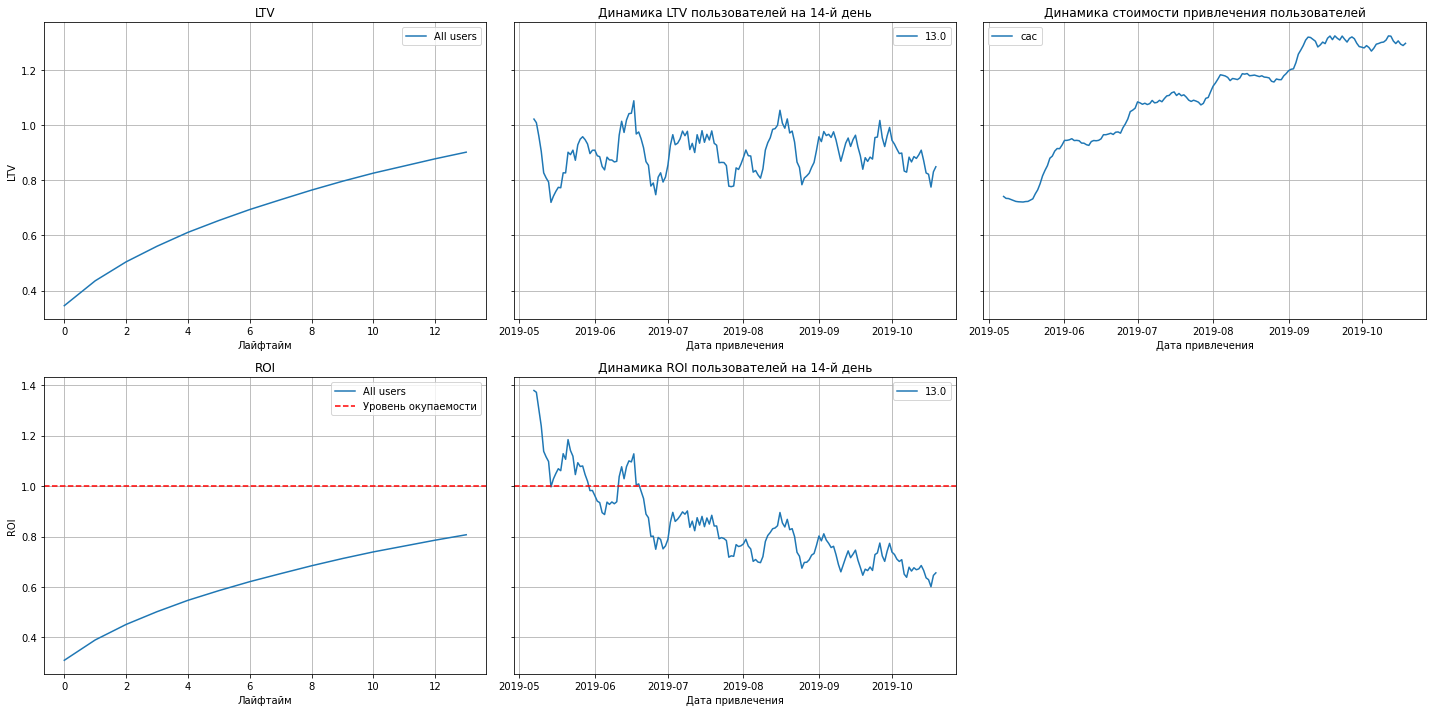

In [50]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_actual, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

 * Реклама не окупается, на 14 дней ROI лишь приближается к 0.8
 * LTV колеблется в течении месяца, но в целом остается в одном диапазоне 0,8-1, значит дело не в пользователях 
 * CAC растет с июня, как мы выяснили ранее за счет источника `TipTop`  
 * ROI 14 дня снижается с июня

**Проверим конверсию пользователей, удержание пользователей и динамику их изменения**

### Расчет конверсии

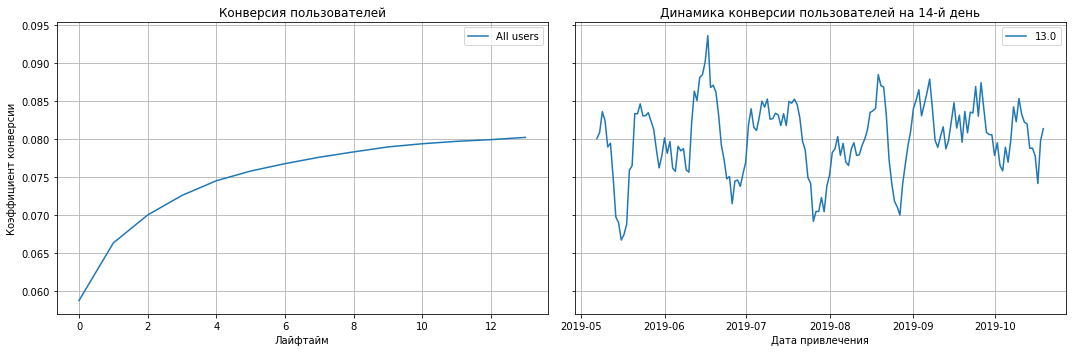

In [51]:
# смотрим общую конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_actual, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи конвертируются хорошо, по динамике 14 дня есть колебания, но глобальных тенденций на снижение нет,  
конверсия в диапазоне от 7 до 9%

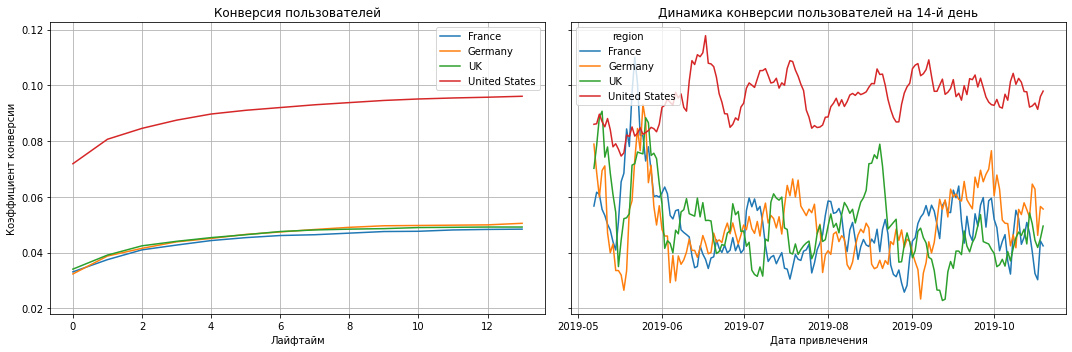

In [52]:
#посмотрим конверсию в разбивке по регионам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_actual, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

 * конверсия США стабильно высокая
 * конверсия стран Европы на одном уровне, ниже США в 2 раза

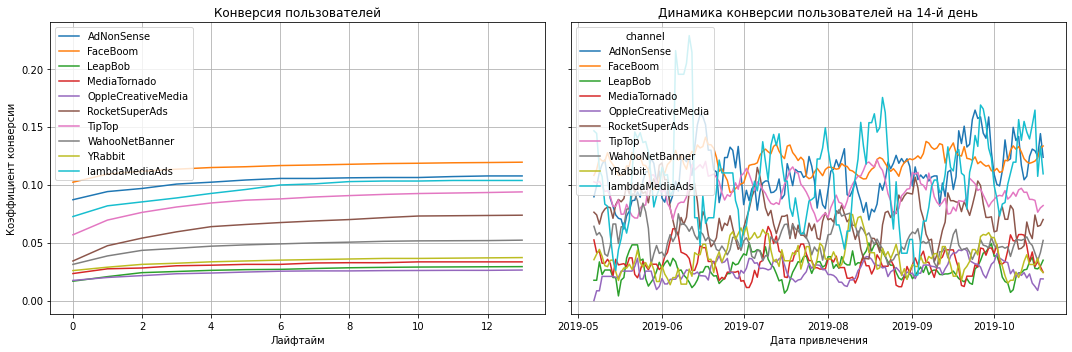

In [53]:
# смотрим конверсию с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_actual, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

 * Самая высокие конверсии - `FaceBoom`,`AdNonSense`, `lambdaMediaAds`,`TipTop`  
Динамика читается плохо, разобьем на пользователей США и Европы

     Пользователи США


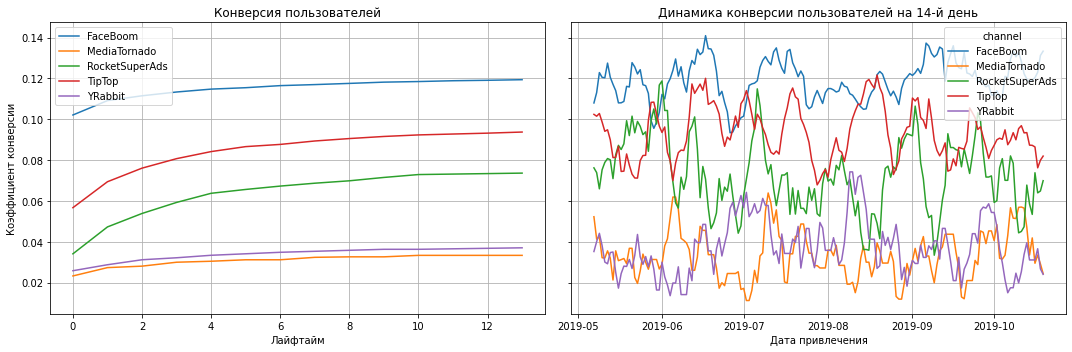

In [54]:
#посмотрим конверсию  каналам США
print('     Пользователи США')
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_actual.query('region_main == "US"'), orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсии - `FaceBoom`  
Миниальные - `MediaTornado`,`YRabbit`  

В динамике:
 * `FaceBoom` - самая стабильная конверсия
 * `RocketSuperAds`  - сильно подвержена колебаниям
 * `YRabbit`  наблюдается увеличение конверсии в июле - августе  
 
 Глобальных тенденций на снижение/повышение не наблюдается

     Пользователи Европы


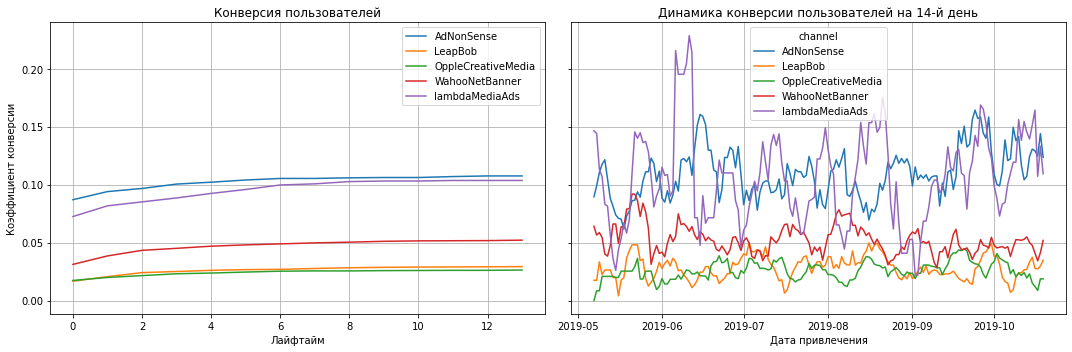

In [55]:
#посмотрим конверсию  каналам Европы
print('     Пользователи Европы')
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_actual.query('region_main == "EU"'), orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самые высокие конверсии - `AdNonSense`, `lambdaMediaAds`  
Минимальные - `LeapBob`, `OppleCreativeMedia`  

В динамике:
 * `lambdaMediaAds`  - сильно выражены колебания, пик в июне
 * `AdNonSense`  наблюдается увеличение конверсии в сентябре - октябре  
 


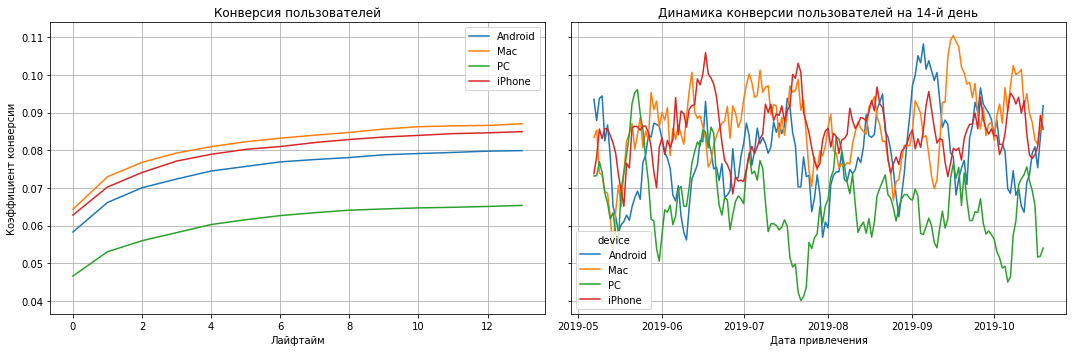

In [56]:
#посмотрим конверсию в разбивке по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_actual, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

 * Конверсия пользователей Mac самая высокая
 * Конверсия Android выше Iphone
 * Динамика конверси ПК стабильно низкая

 **Вывод**
 * **Конверсия пользвателей США на высоком уровне, за счет крупных каналов с высокой конверсией**
 * **В Европе общая конверсия на 1,5% ниже, тк высокий уровень конверсии наблюдается только на самых малочисленных каналах**
 * **Конверсия на всех устройствах, кроме ПК на одном уровне**

### Расчет удержания

In [57]:
# смотрим общеее удержание

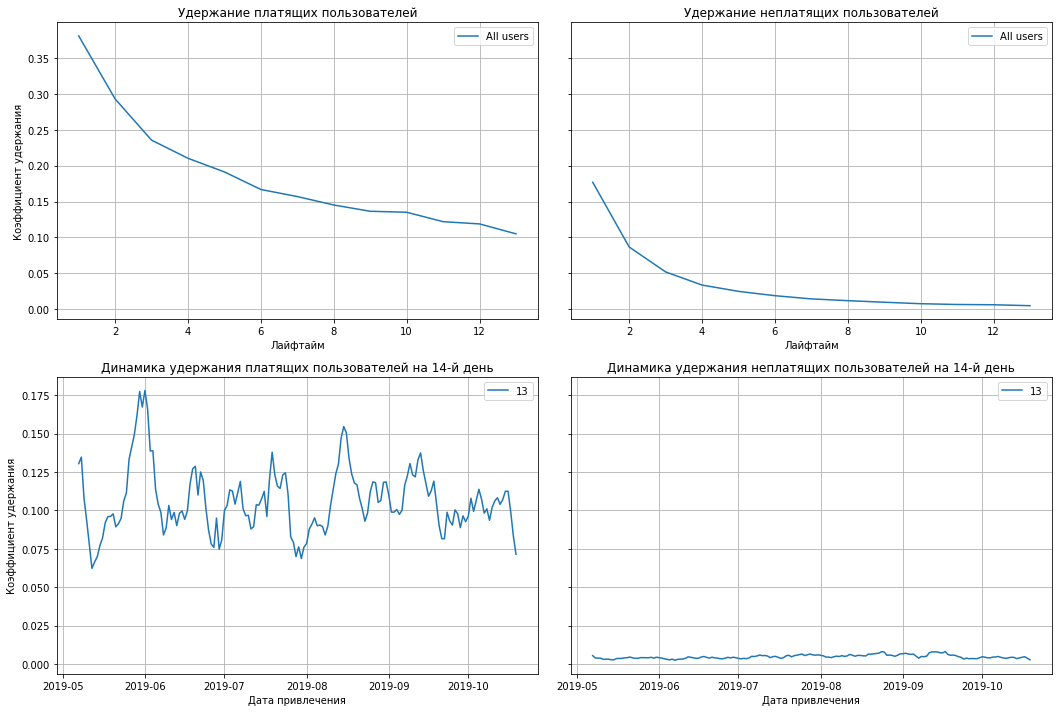

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_actual, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

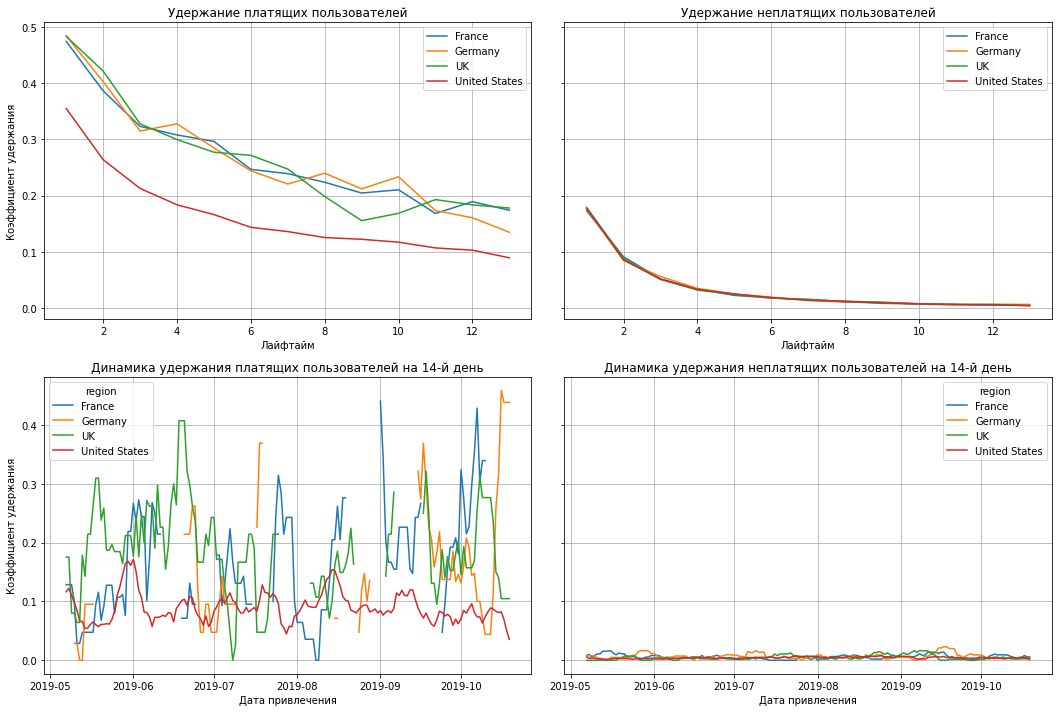

In [59]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_actual, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

 * Самое низкое удержание в США, ниже Европы на 10%, динамика 14 дня стабильно низкая на протяжении всего анализируемого периода


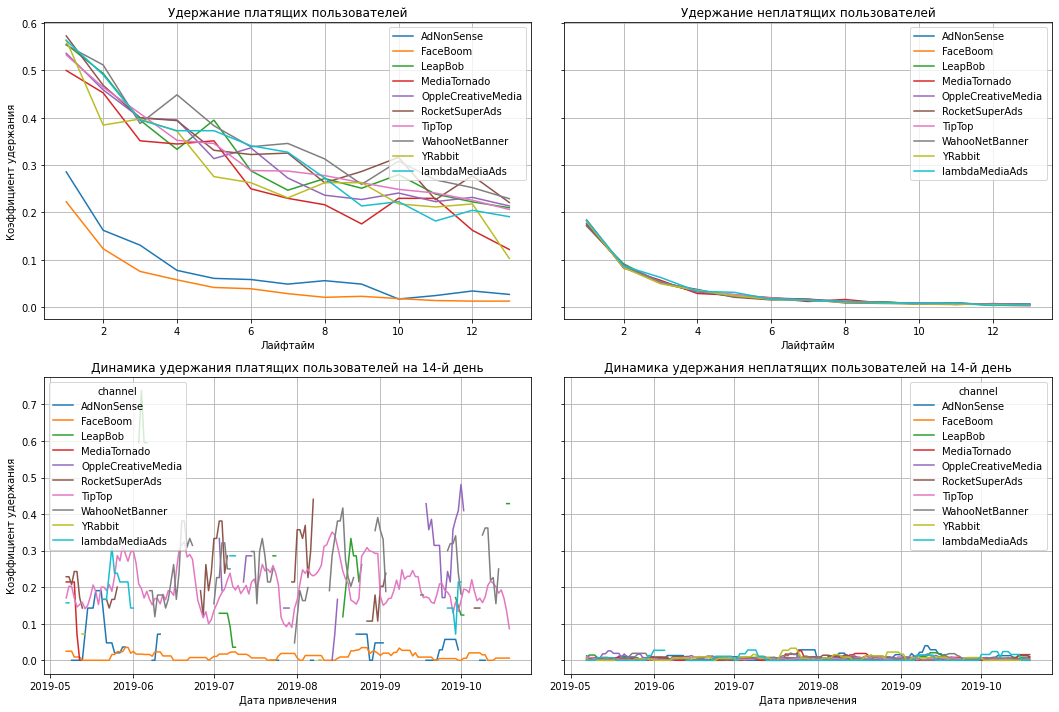

In [60]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_actual, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Хуже всего удержание у каналов `FaceBoom` - США и `AdNonSense` - Европа, на уровне неплатящих пользователей

     Пользователи США


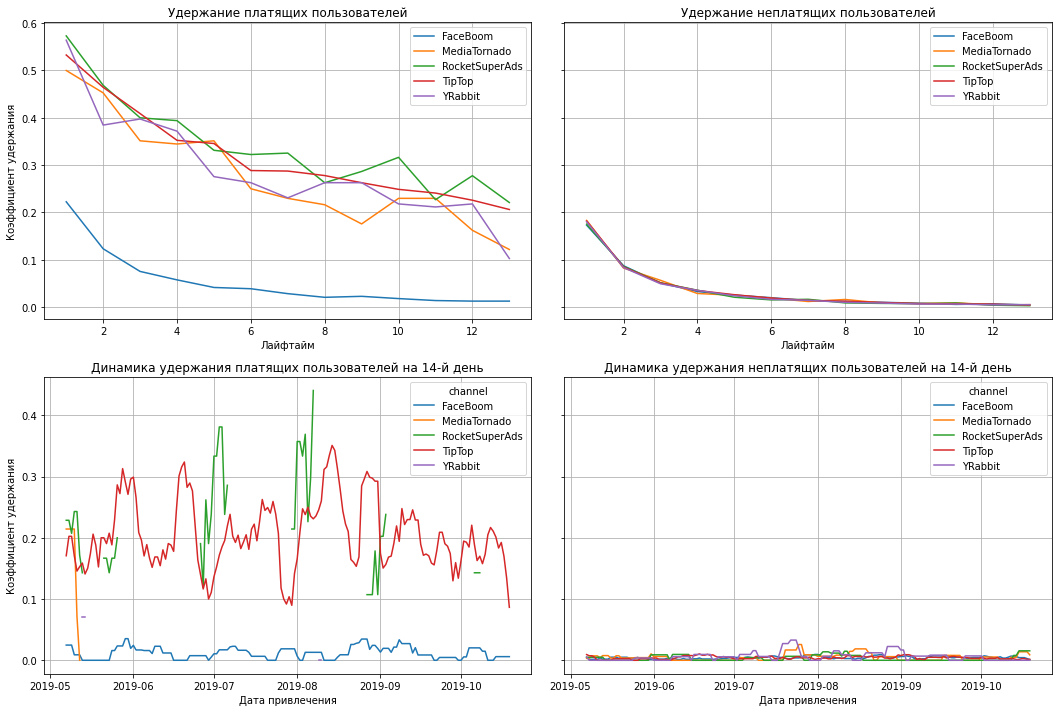

In [61]:
# смотрим удержание с разбивкой по каналам США
print('     Пользователи США')
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_actual.query('region_main == "US"'), visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание`TipTop` подвержено колебаниям, но в целом стабильно  
`FaceBoom` стабильно низкая  
Не все когорты `MediaTornado` и `YRabbit` доживают до 14 лайфтайма  

     Пользователи Европы


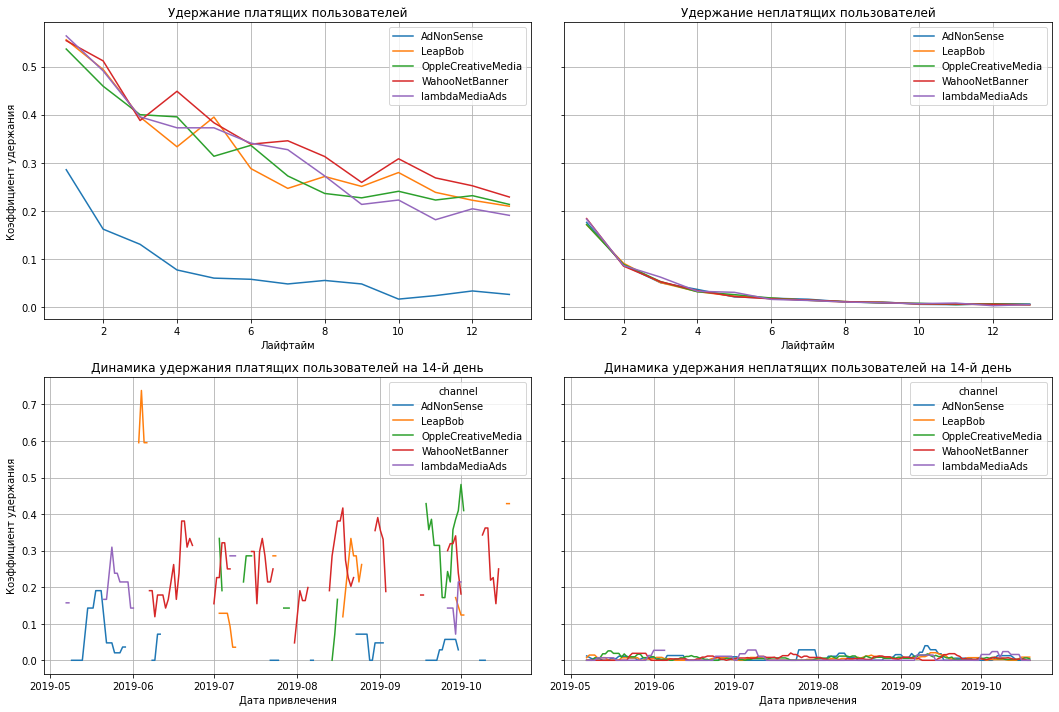

In [62]:
# смотрим удержание с разбивкой по каналам Европы
print('     Пользователи Европы')
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_actual.query('region_main == "EU"'), visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Не все когорты пользователей Европы доживают до 14 лайфтайма  
Пользователи, пришедшие через`WahooNetBanner` более равномерно распределены по времени анализа в отличии от остальных

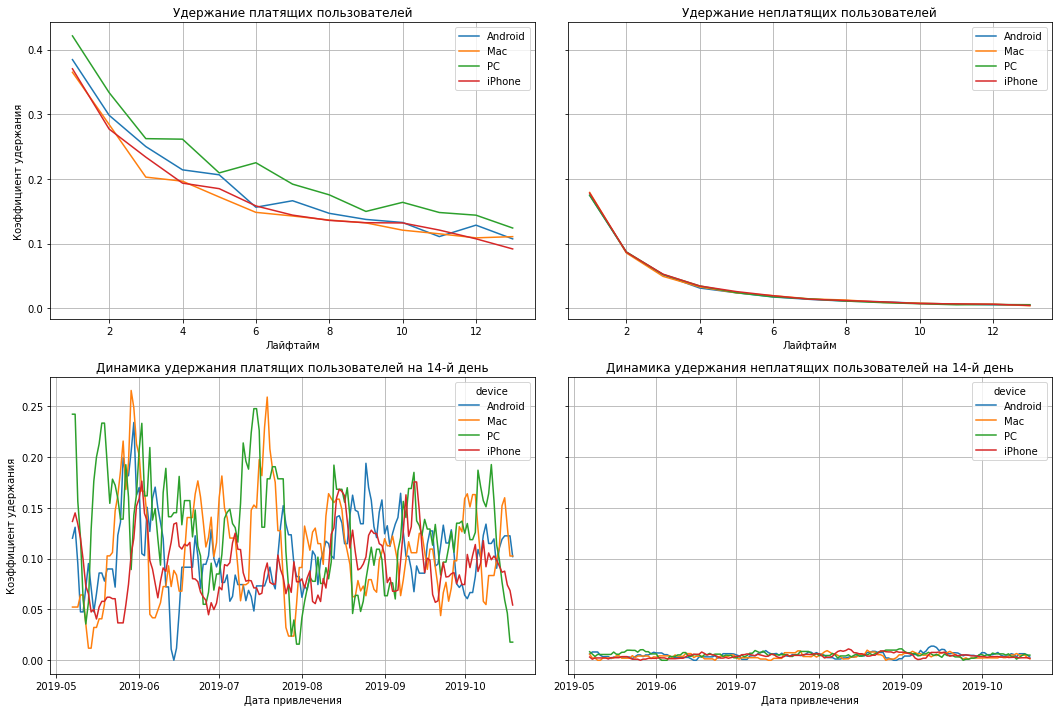

In [63]:
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_actual, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

 * Удержание мало зависит от устройства
 * Динамика удержания на мобильных телефонах более стабильна, в отличии от ПК и Mac  

**Вывод:**
 * **Удержание пользователей США ниже Европы на 10%, за счет низких показателей крупного канала `Faceboom`**
 * **Удержание не зависит от типа устройств**

### Окупаемость рекламы с разбивкой по регионам:

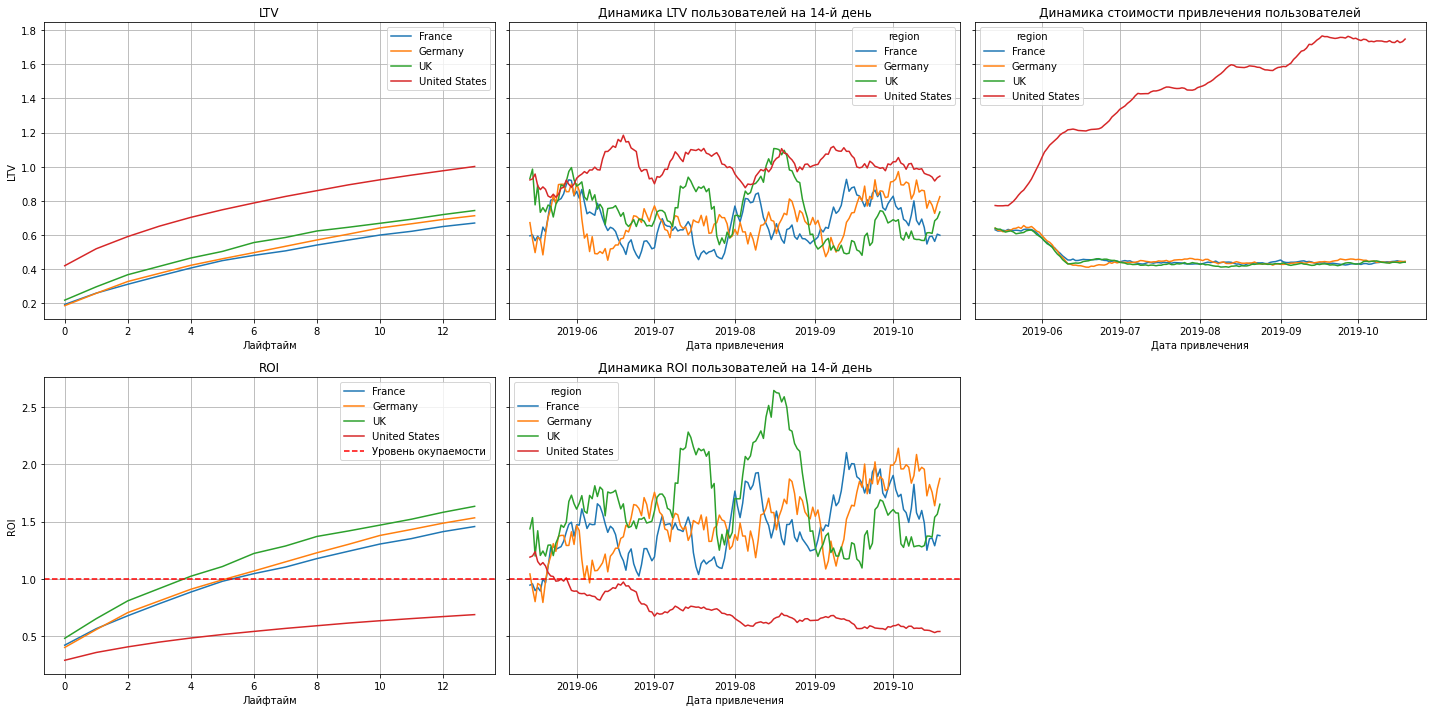

In [64]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_actual, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

 * LTV максимален у пользователей США, страны Европы ~ на одном уровне, UK выше других стран
 * Динамика LTV в целом стабильна, выраженные колебания у пользователей UK
 * CAC на начальном этапе у пользователей США и Европы была сопоставима
 * CAC пользователей США выросла в более чем два раза с мая по сентябрь
 * CAC пользователей Европы снизилась в начале анализируемого периода в полтора раза и далее оставалась стабильной
 * Реклама окупается только в странах Европы, в США нет
 * ROI США был положителен на начальном этапе, в мае, но после роста CAC начал снижаться
 * ROI Европы имеют небольшую тенденцию к росту
 * ROI UK имеет выраженные пики в июле и августе 

### Oкупаемость рекламы с разбивкой по каналам:

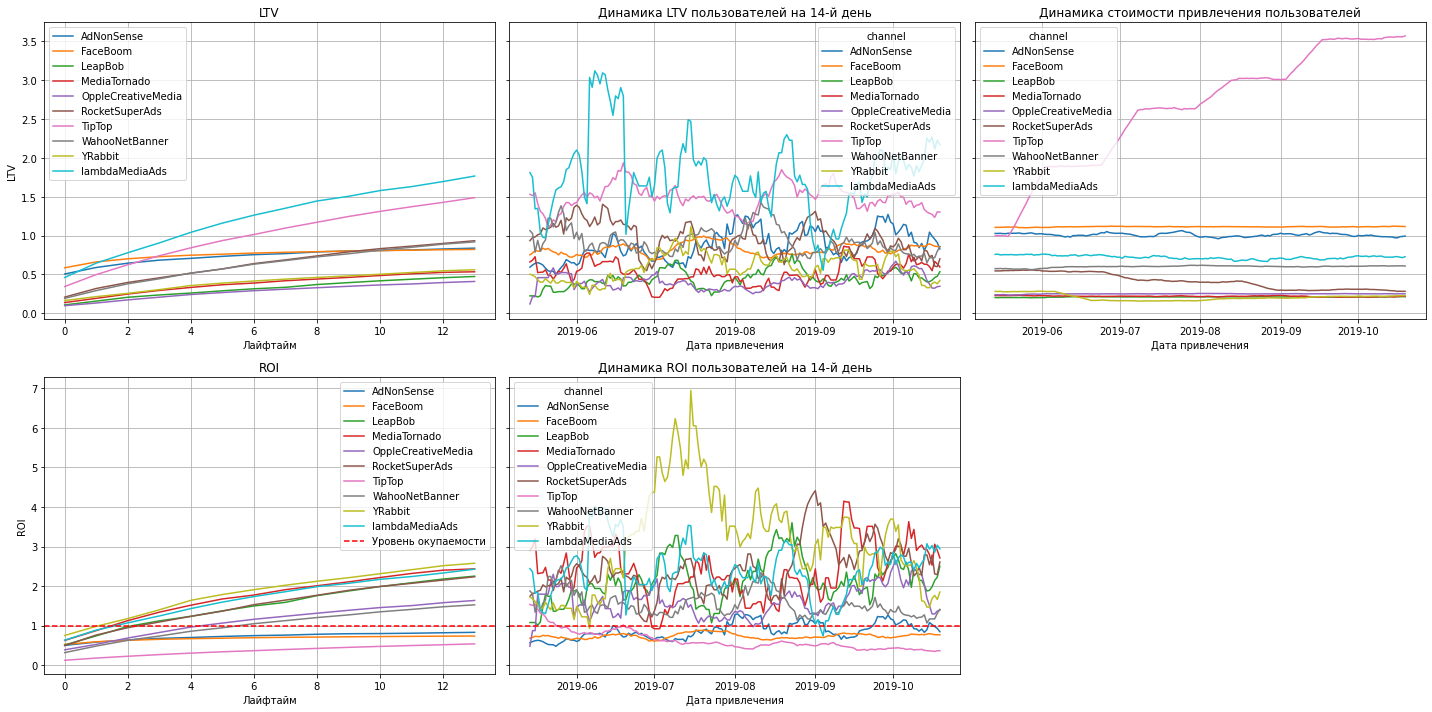

In [65]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_actual, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

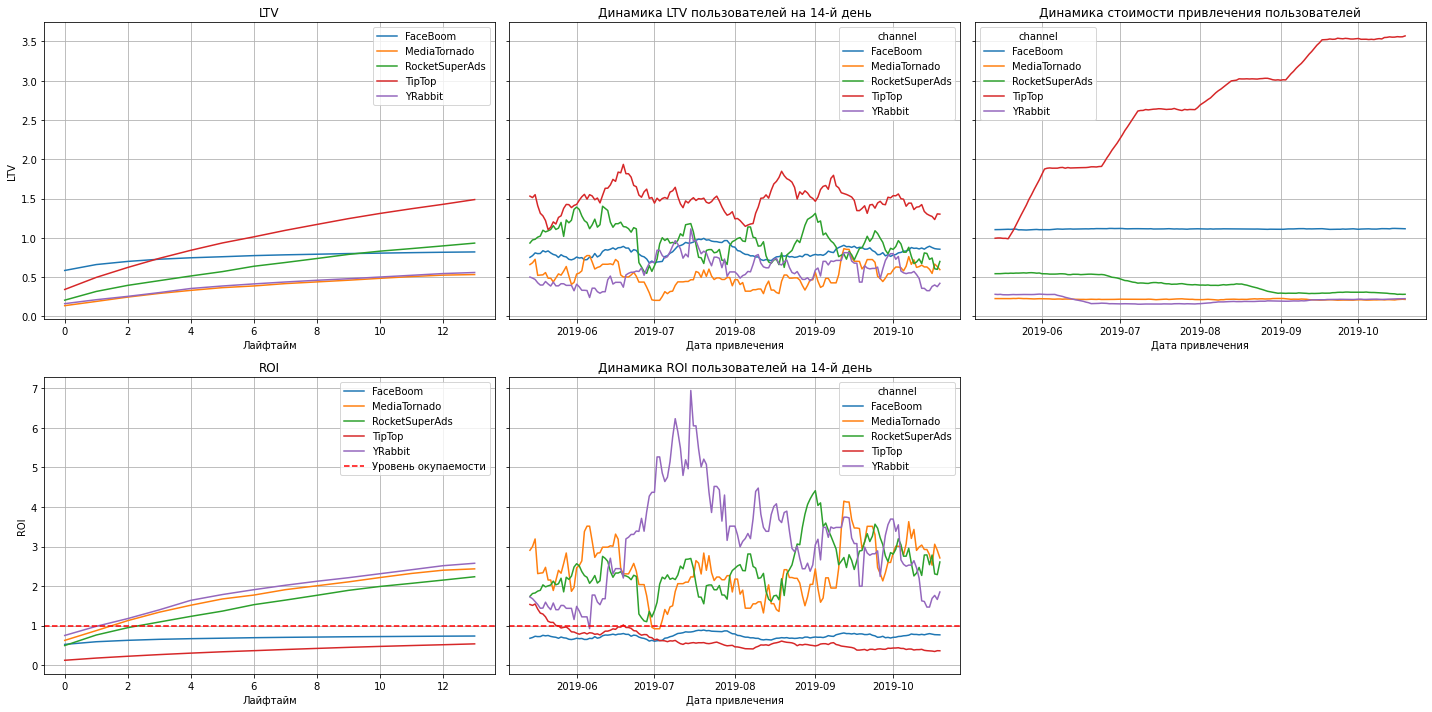

In [66]:
#по каналам США
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_actual.query('region_main == "US"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

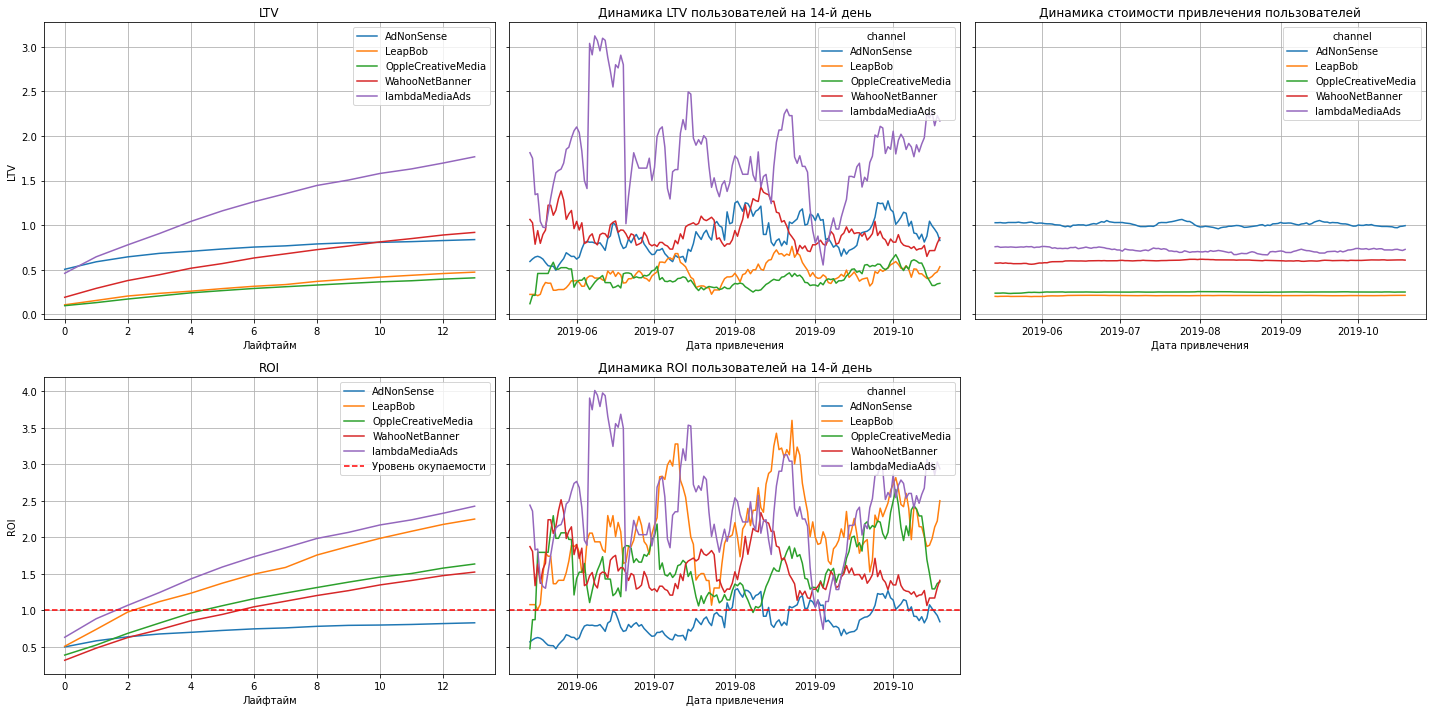

In [67]:
#по каналам Европы
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_actual.query('region_main == "EU"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

 * LTV максимален у пользователей `lambdaMediaAds`, `TipTop`
 * Динамика LTV в целом стабильна, выраженные колебания у канала `lambdaMediaAds`
 * CAC канала `TipTop` выросла в 3,5 раза с момента начального этапа
 * Реклама **не** окупается на каналах `FaceBoom` `TipTop` `AdNonSense` 
 * ROI канала `TipTop` был положителен на начальном этапе, в мае, но после роста CAC начал снижаться
 * ROI `AdNonSense` периодически выходит в плюс (август, сентябрь)
 * ROI `YRabbit` в августе был экстремально высоким (за счет роста LTV)

### Окупаемость рекламы с разбивкой по устройствам:

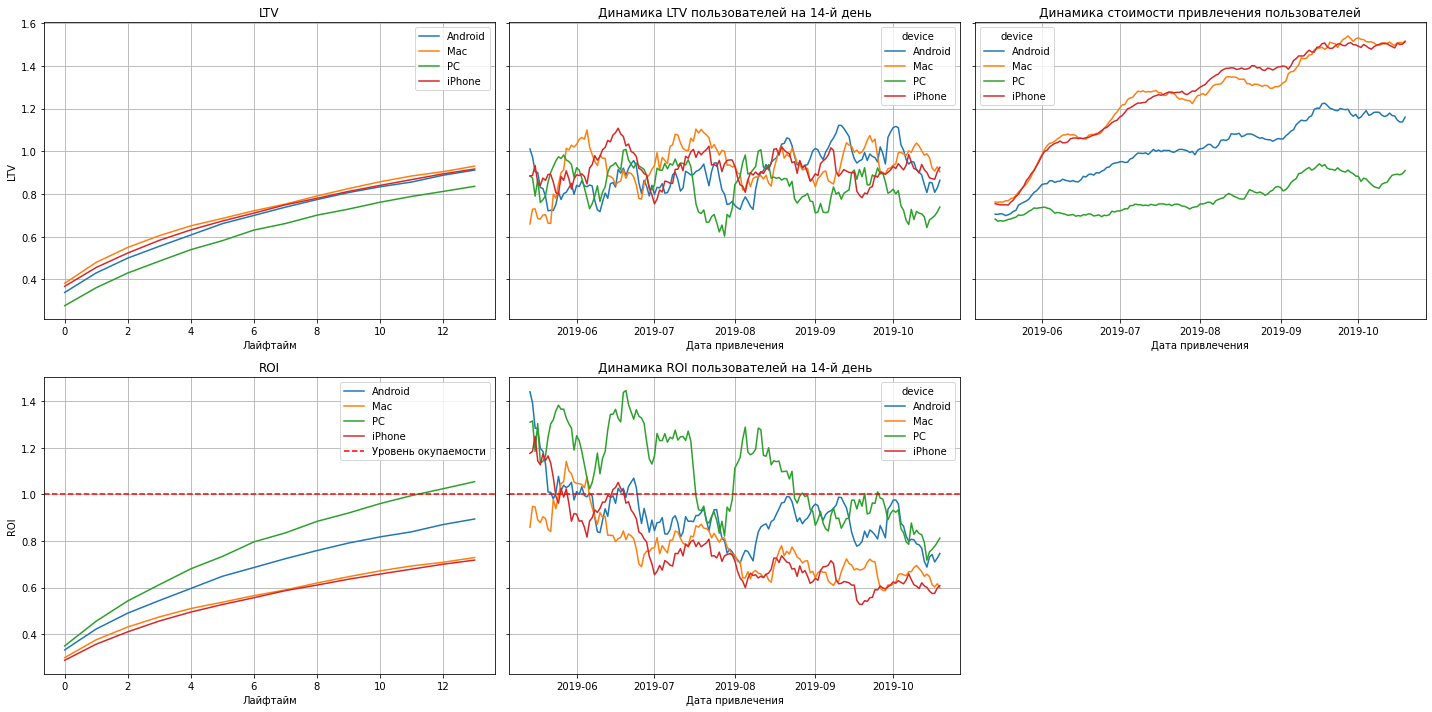

In [68]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_actual, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

 * LTV минимален у пользователей ПК, остальные ~ на одном уровне
 * Динамика LTV стабильна за исключением пользвателей ПК - уменьшается с июля
 * CAC пользователей Apple ноутбуков и мобильных устройств равны
 * CAC пользователей Apple выше остальных
 * Все САС кроме ПК имеют тенденцию к росту (ПК минимально)
 * Реклама окупается только у пользователей ПК
 * Самый низкий ROI у пользователей Apple
 * ROI уменьшается по всем каналам на протяжении анализируемого временного отрезка 


**Ключевые проблемы с каналами США - `FaceBoom` и `TipTop` не окупаются:**
* **FaceBoom имеет низкую CAC, но удержание на уровне бесплатных пользователей**
* **TipTop имеет высокий уровень удержания, но слишком высокие затраты на рекламу, котрые не покрываются LTV**

### Распределение количества пользователей каналов в зависимости от устройств:

In [69]:
profiles_act_DVC = profiles_actual.pivot_table(index=['channel'], columns='device', values='user_id', 
                              aggfunc='count', margins = True, margins_name='total').sort_values(
                                            by = 'PC', ascending=False)
#ad_costs_sum.loc['total']= ad_costs_sum.sum()
profiles_act_DVC = profiles_act_DVC.drop(columns=['total'])
profiles_act_DVC['Android,%'] = (profiles_act_DVC['Android'] *100/ profiles_act_DVC.loc['total', 'Android']).apply('{:.1f}%'.format)
profiles_act_DVC['Mac,%'] = (profiles_act_DVC['Mac'] *100/ profiles_act_DVC.loc['total', 'Mac']).apply('{:.1f}%'.format)
profiles_act_DVC['PC,%'] = (profiles_act_DVC['PC'] *100/ profiles_act_DVC.loc['total', 'PC']).apply('{:.1f}%'.format)
profiles_act_DVC['iPhone,%'] = (profiles_act_DVC['iPhone'] *100/ profiles_act_DVC.loc['total', 'iPhone']).apply('{:.1f}%'.format)
display(profiles_act_DVC)

device,Android,Mac,PC,iPhone,"Android,%","Mac,%","PC,%","iPhone,%"
channel,,,,,,,,
total,21841,18693,19153,33882,100.0%,100.0%,100.0%,100.0%
OppleCreativeMedia,2526,882,3496,1701,11.6%,4.7%,18.3%,5.0%
WahooNetBanner,2577,856,3409,1711,11.8%,4.6%,17.8%,5.0%
LeapBob,2580,880,3402,1691,11.8%,4.7%,17.8%,5.0%
FaceBoom,5875,7265,3008,12996,26.9%,38.9%,15.7%,38.4%
TipTop,3889,4820,2012,8840,17.8%,25.8%,10.5%,26.1%
AdNonSense,1109,410,1563,798,5.1%,2.2%,8.2%,2.4%
lambdaMediaAds,613,241,862,433,2.8%,1.3%,4.5%,1.3%
YRabbit,865,1097,482,1868,4.0%,5.9%,2.5%,5.5%


 Реклама на ПК окупается, тк самые убыточные канала `FaceBoom` и `TipTop`занимимают в этом девайсе низкую долю - 25%  
 Тогда как на устройствах Apple этот показатель 65%, Android - 45%   
 Это же объясняет более низкий ROI  у пользователей Apple по сравнению с Android
 

### Анализ TipTop

В мае канал `TipTop` был окупаем, посмотрим, что могло привести к увеличению расходов на рекламу

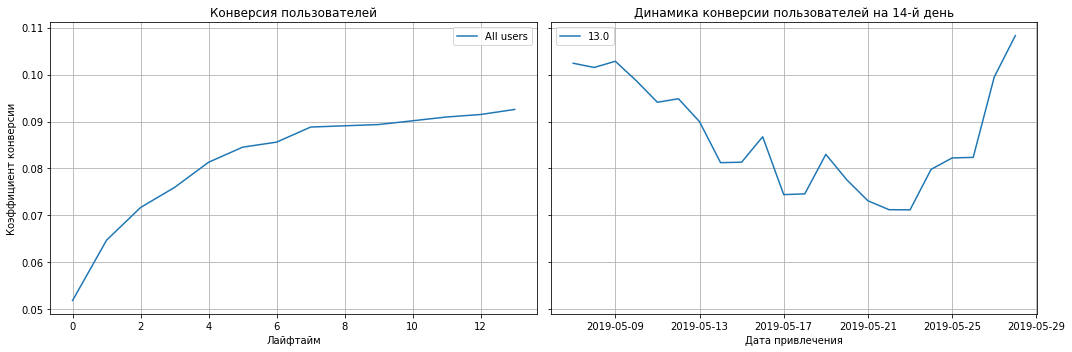

In [70]:
# смотрим общую конверсию
observation_date = datetime(2019, 6,10).date()
profiles_actual_TT = profiles_actual.query('channel == "TipTop"')
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_actual_TT, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия практически сразу начала снижаться, видим рост, который произошел после увеличения CAC

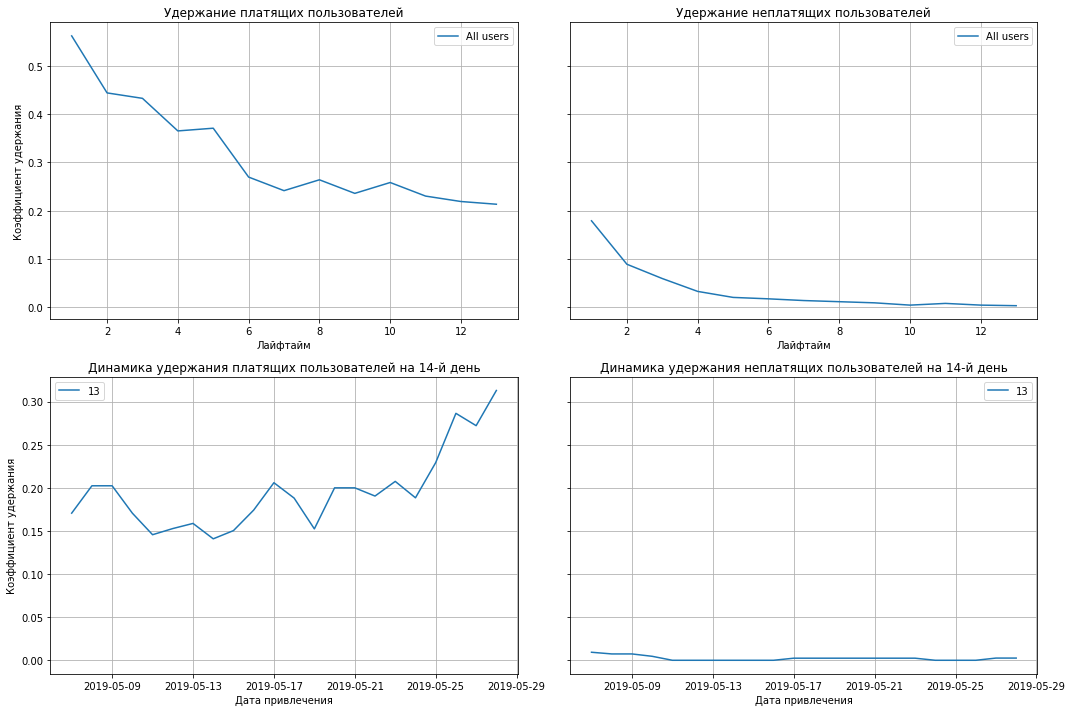

In [71]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_actual_TT, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание было в норме

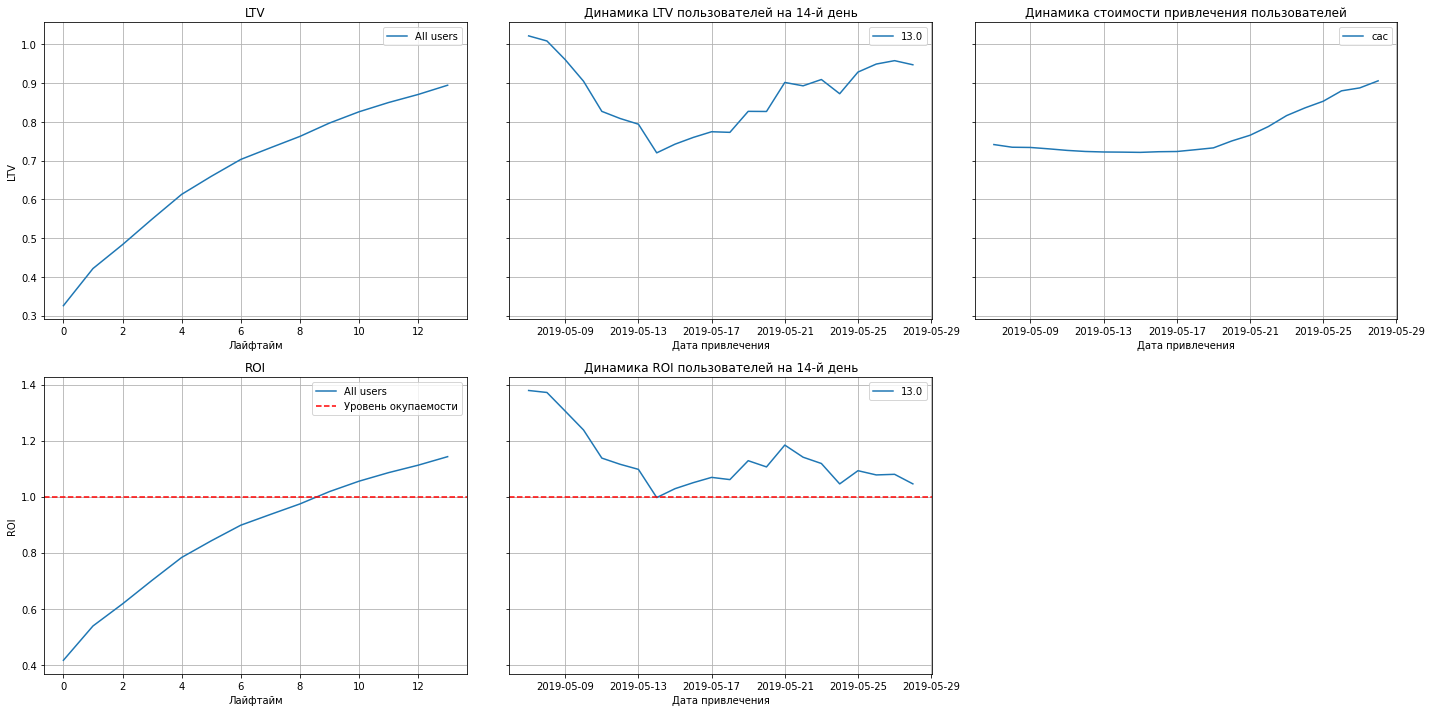

In [72]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_actual, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

В самом начале анализируемого периода ROI был положителен, но с уменьшением конверсии, LTV стала снижаться, что привело к падению ROI ниже единицы  
Таким образом, увеличение бюджета рекламы было направлено на увеличение конверсии, но рост LTV не смог компенсировать затрат 

## Выводы ##

Мы изучила данные пользователей и затраты на рекламу приложения Procrastinate Pro+.  

По результатам анализа:

 * реклама, направленная на привлечение пользователей в целом **не окупается**

Основная проблема в регионе **США**.  

Оба крупных рекламных канала США `FaceBoom` и `TipTop` не окупаются:
 * FaceBoom имеет низкую CAC, но удержание на уровне бесплатных пользователей
 * TipTop имеет высокий уровень удержания, но слишком высокие затраты на рекламу, котрые не покрываются LTV
 
Рекомендации:

 * Увеличить Retention канала `FaceBoom`  

Для этого необходимо проверить настройки канала.  
Тк удержание не зависит от устройста маловероятно, что дело в самом приложении.
Возможно приложение не решает задач пользователя - целевая аудитория выбрана неверно или неправильно настроены 
ключевые слова  

 * Сократить бюджет на канале `TipTop`.  

Проанализировать действия конкурентов - конверсия в мае могла снизиться из-за того, что пользователей могли чаще переходить в приложение конкурента.  
Необходиом продумать способы сохранения конверсии - обойти конкурента без увеличения  бюджета.  
Если это невозможно, искать другой канал.  

 * Уделить внимание на оккупаемые каналы с приемлимым уровнем конверсии и удержания как потенциально способных к росту:  
  * `RocketSuperAds` - высокая конверсия, высокое удержание  
 

Каналы **Европы** в целом окупаются.  
Но конверсии крупных каналов Европы в ниже, чем США, возможно это особенность рынка  
Проблемы наблюдаются с каналом `AdNonSense`- удержание на уровне бесплатных пользователей.  

Рекомендации:  

 * Проверить настройки выбора целевой аудитории и/или ключевых слов.
 
Отмечу, что данный канал имеет больше всего пользователей на ПК
